# Homework (16 pts) - Cross Validation

1. (5 pts) Write pseudocode for the steps involved in optimizing a model with hyperparameters using cross validation and evaluating it on data it was never trained on.

2. (3 pts) For the linear model $y = \beta x$, would you use cross validation? Why or why not?

3. (5 pts) For the breast cancer dataset below, first standardize the data, then fit the standardized data with a K-Nearest Nerighbors model by following the steps you outlined in #1 above. Report the number of nearest neighbors K in the optimal model and the model's mean squared error.

In [26]:
from sklearn import datasets

dataset = datasets.load_boston()

print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
X = dataset.data
y = dataset.target

X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y = y - y.mean()
y = y / y.std()

import pandas as pd

df = pd.DataFrame(X, columns=dataset.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [23]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 51)}
knnmodel = neighbors.KNeighborsRegressor()
cvmodel = GridSearchCV(knnmodel, params, cv=10, scoring='neg_mean_squared_error')
cvmodel.fit(X_train, y_train)
K = cvmodel.best_params_['n_neighbors']

print(f"Optimal number of nearest neighbors is K = {K}")

Optimal number of nearest neighbors is K = 3


In [24]:
model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

mse = ( ( y_test - model.predict(X_test) )**2 ).mean()

print(f"MSE K={K}: {mse}")

MSE K=3: 0.1915476828669559


4. (3 pts) For your model from #3 above, plot the known vs. predicted prices for the houses in the test group.

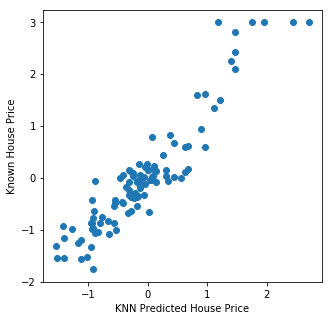

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(model.predict(X_test), y_test, 'o')
plt.xlabel('KNN Predicted House Price')
plt.ylabel('Known House Price');